In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

In [47]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font', size=20)

## Find common relationships

In [136]:
dataset_path = '/Users/nina/Documents/UCL/PATHME_DATA'
amie_path = 'res_by_rel_pathme.txt'
ce_tuck_path = 'tucker_pathme_RELATION.csv'
bce_tuck_path = 'tucker_pathme_BCE_RELATION.csv'
ce_cp_path = 'cplex_PATHME_realtion.csv'
bce_cp_path = 'cplex_bce_PATHME_realtion.csv'
cbr_path = 'per_relation_scores.json'
###############ENTTIES PATHS############
ce_cp_ent_path = 'pathme_cplex_RELATION.out'
bce_cp_ent_path = 'pathme_cplex_BCE_RELATION.out'
ce_t_ent_path = 'save_pathme_tucker.out'
bce_t_ent_path = 'save_pathme_BCE_tucker.out'

In [13]:
##NEGSAMPLINGRELS
ph_cp_path = 'cplexPH_PATHME_relation.csv'
ph_tu_path = 'tuckerPH_PATHME_relation.csv' 
pw_cp_path = 'cplexPW_PATHME_relation.csv'
pw_tu_path = 'tuckerPW_PATHME_relation.csv'
####ENTITIESPATH#####
ph_cp_path_ent = 'pathme_cplex_PH_RELATION.out'
pw_cp_path_ent = 'pathme_cplex_PW_RELATION.out'
ph_tu_path_ent = 'pathme_tuck_PH_RELATION.out'
pw_tu_path_ent = 'pathme_tuck_PW_RELATION.out'

In [3]:
from libkge import datasets
d = datasets.load_dataset_from_dir(dataset_path)

/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nina/opt/anaconda3/envs/libkge

In [4]:
train_data = pd.DataFrame(d.data['train'])
relation_count = train_data[1].value_counts()

In [5]:
relation_count

1    21020
0    16863
2     5511
4     2869
3     1561
6     1212
5     1212
Name: 1, dtype: int64

In [114]:
def plot_all_rels(dfs, labels, rule_based=False, save=None):
    concat = [] 
    
    palette = {'CE Complex': 'blue',
                  'BCE Complex': 'royalblue',
                  'PH Complex': 'skyblue',
                   'PW-Log Complex': 'dodgerblue',
                  'CE Tucker': 'indianred',
                  'BCE Tucker': 'salmon', 
                  'PW-Log Tucker': 'sandybrown',
                  'PH Tucker': 'peru', 
                  'AMIE': 'mediumpurple',
                  'CBR': 'plum'}
    
    for i,df in enumerate(dfs):

    #         if mean:
    #             d = df.groupby(groupby_l)[[get, 'rel_occurrence']].apply(lambda x: weighted_av(x, mrr)).reset_index(name=get)
    # #             d = df.groupby(groupby_l)['h@10'].mean().reset_index()
    #         else:
    #             d = df.groupby(groupby_l)[get].sum().reset_index()
        if len(labels) > 0:
            df = df.sort_values(by = 'rel_occurrence', axis=0)
            df['rel_name'] = df['Relation'].apply(lambda x: d.rel_mappings.inverse[x])
            if rule_based:
                df['label'] = labels[i]
            else:
                loss, mod = labels[i].split(' ')
                df['label_model'] = mod
                df['label_loss'] = loss
            df['color'] = labels[i]
        concat.append(df)

    conc = pd.concat(concat)
    
    f = plt.figure(figsize=(50,15))
    if rule_based:
        g = sns.FacetGrid(conc, row="label", aspect=3, height=4, hue='color', palette=palette)
    else:

        g = sns.FacetGrid(conc, row="label_loss", col="label_model", margin_titles=True, aspect=5, hue='color', palette=palette)
        
    g.map(sns.barplot, 'rel_name', 'h@10')
#     g.set(xlabel='Relation')
    g.set_xticklabels(rotation=40, horizontalalignment='right', fontweight='light',)
    
    if not rule_based:
        axes = g.axes.flatten()
        axes[0].set_title("Complex")
        axes[-1].set_xlabel("Relation")
        axes[1].set_title("Tucker")
        axes[-2].set_xlabel("Relation")
    

        for ax in axes:
            # Make right ylabel more human-readable and larger
        # Only the 2nd and 4th axes have something in ax.texts
            if ax.texts:
                # This contains the right ylabel text
                txt = ax.texts[0]
                ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                        txt.get_text().split('=')[1],
                        transform=ax.transAxes,
                        va='center',)
                # Remove the original text
                ax.texts[0].remove()
    else:
        axes = g.axes.flatten()
        axes[0].set_title("AMIE")
        axes[1].set_title("CBR")

    plt.xlabel('Relation')
#     plt.xticks(rotation=-15)
    plt.tight_layout()
    if save is not None:
        g.savefig(save + '.svg', format='svg', dpi=1200)

## Relation analysis

In [8]:
ce_tuck = pd.read_csv(ce_tuck_path)
bce_tuck = pd.read_csv(bce_tuck_path)
bce_cp = pd.read_csv(bce_cp_path)
ce_cp = pd.read_csv(ce_cp_path)
amie_res_rel = pd.read_csv(amie_path, sep='\t', header=None)
with open(cbr_path, 'r') as f:
    cbr = json.load(f)

In [14]:
ph_tuck = pd.read_csv(ph_tu_path)
pw_tuck = pd.read_csv(pw_tu_path)
pw_cp = pd.read_csv(pw_cp_path)
ph_cp = pd.read_csv(ph_cp_path)

In [9]:
amie_res_rel[0] = amie_res_rel[0].apply(lambda x: d.rel_mappings[x])
amie_res_rel.drop(columns=[1,2,3,4,5,6], inplace=True)
amie_res_rel.columns = ['Relation', 'h@10', 'h@1', 'MRR']
amie_res_rel['h@10'] = amie_res_rel['h@10'].apply(lambda x: x/100)

In [10]:
cbr = pd.DataFrame(cbr).T.reset_index()
cbr.rename(columns={'index': 'Relation'}, inplace=True)
cbr['Relation'] = cbr['Relation'].apply(lambda x: d.rel_mappings[x])

In [11]:
cbr.rename(columns={'hits_10': 'h@10', 'mrr': 'MRR'}, inplace=True)

In [12]:
def set_occurrence(df):
    df['rel_occurrence'] =  df['Relation'].apply(lambda x: relation_count[x])
set_occurrence(bce_cp)
set_occurrence(ce_cp)
set_occurrence(ce_tuck)
set_occurrence(bce_tuck)
set_occurrence(cbr)
set_occurrence(amie_res_rel)

In [15]:
set_occurrence(ph_tuck)
set_occurrence(pw_tuck)
set_occurrence(pw_cp)
set_occurrence(ph_cp)

<Figure size 3600x1080 with 0 Axes>

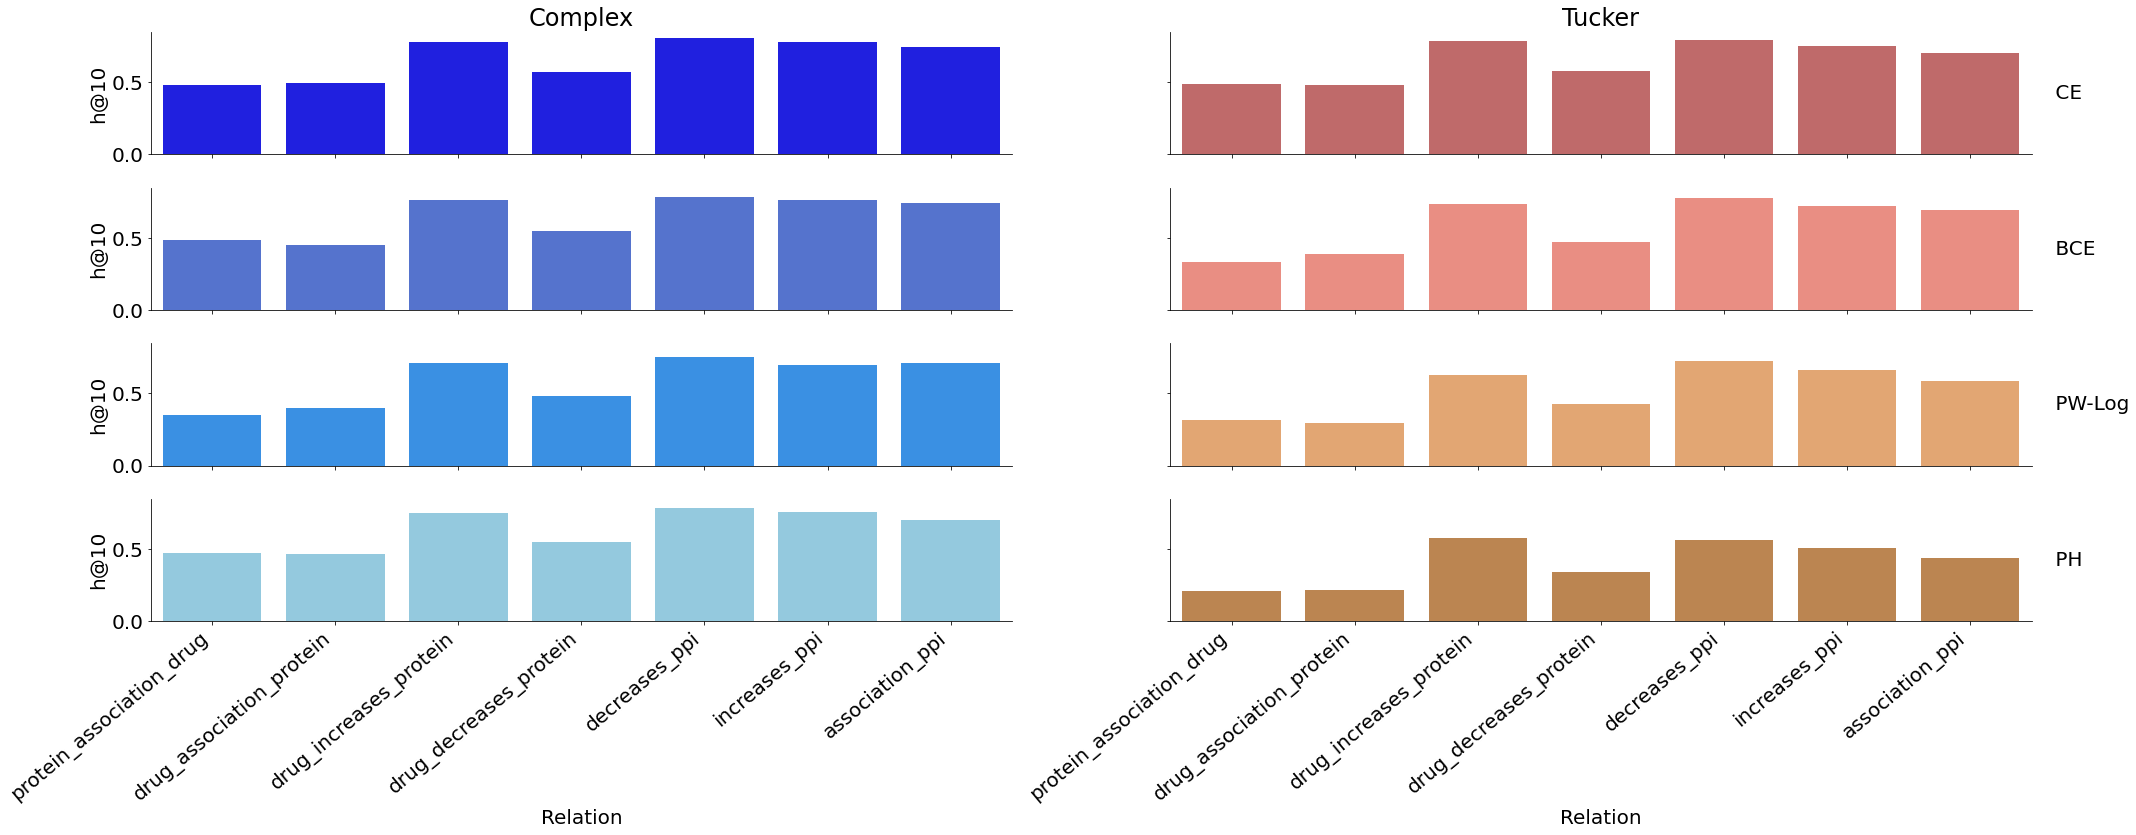

In [95]:
dfs = [ce_cp, bce_cp, pw_cp, ph_cp, ce_tuck, bce_tuck, pw_tuck, ph_tuck]
labels = [ 'CE Complex', 'BCE Complex',  'PW-Log Complex', 'PH Complex', 'CE Tucker', 'BCE Tucker', \
          'PW-Log Tucker', 'PH Tucker']
plot_all_rels(dfs, labels, save='pathme_rels')

In [94]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font', size=20)

<Figure size 3600x1080 with 0 Axes>

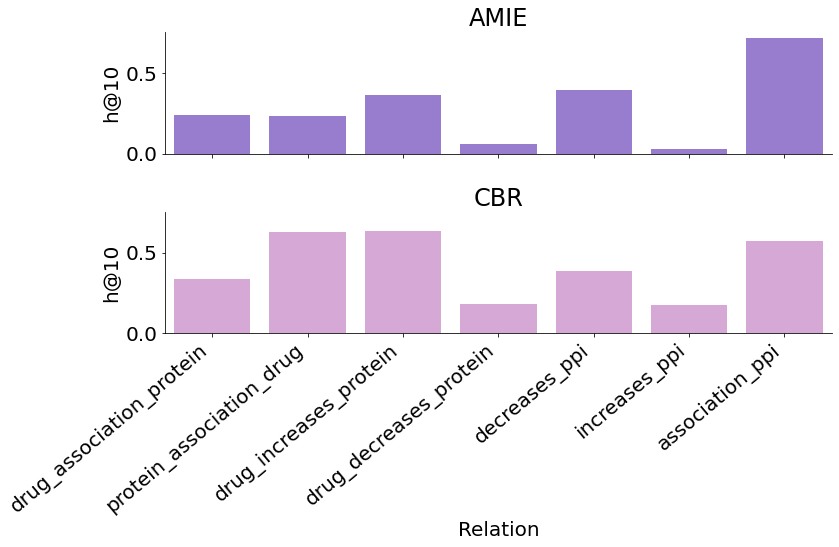

In [115]:
dfs = [amie_res_rel, cbr]
labels = [ 'AMIE', 'CBR']
plot_all_rels(dfs, labels, rule_based=True, save='pathme_rels_AMIECBR')

## Entities analysis

In [117]:
def get_entities_info(path):
    v_rare_head = False
    v_rare_tail = False
    rare_h = False
    rare_t = False
    common_h = False
    common_t = False
    vcommon_h = False
    vcommon_t = False
    vvcommon_h = False
    vvcommon_t = False
    with open(path, 'r') as f:
        cplex_cp_ents = []
        for l in f.readlines():
            res = []

            if 'VERYRARE HEAD' in l:
                if not v_rare_head:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very rare head')
                    v_rare_head = True
                else:
                    continue
            elif 'VERYRARE TAIL' in l:
                if not v_rare_tail:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very rare tail')
                    v_rare_tail = True
                else:
                    continue
            elif 'VERYVERY-COMMON HEAD' in l:
                if not vvcommon_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very very common head')
                    vvcommon_h = True
                else:
                    continue
            elif 'VERYVERY-COMMON TAIL' in l:
                if not vvcommon_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very very common tail')
                    vvcommon_t = True
                else:
                    continue
            elif 'VERY-COMMON HEAD' in l:
                if not vcommon_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very common head')
                    vcommon_h = True
                else:
                    continue
            elif 'VERY-COMMON TAIL' in l:
                if not vcommon_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very common tail')
                    vcommon_t = True
                else:
                    continue
            elif 'COMMON- HEAD' in l:
                if not common_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('common head')
                    common_h = True
                else:
                    continue
            elif 'COMMON- TAIL' in l:
                if not common_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('common tail')
                    common_t = True
                else:
                    continue
            elif 'RARE HEAD' in l:
                if not rare_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('rare head')
                    rare_h = True
                else:
                    continue
            elif 'RARE TAIL' in l:
                if not rare_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('rare tail')
                    rare_t = True
                else:
                    continue
            else:
                continue
            res += [float(mrr), float(h1), float(h3), float(h10)]
            cplex_cp_ents.append(res)
        return cplex_cp_ents

In [137]:
cplex_ents = get_entities_info(ce_cp_ent_path)
bce_cplex_ents = get_entities_info(bce_cp_ent_path)
tuck_ents = get_entities_info(ce_t_ent_path)
bce_tuck_ents = get_entities_info(bce_t_ent_path)

In [138]:
ph_cplex_ents = get_entities_info(ph_cp_path_ent)
pw_cplex_ents = get_entities_info(pw_cp_path_ent)
ph_tuck_ents = get_entities_info(ph_tu_path_ent)
pw_tuck_ents = get_entities_info(pw_tu_path_ent)

In [139]:
len(tuck_ents)

10

In [140]:
len(bce_tuck_ents)

10

In [141]:
len(ph_tuck_ents)

10

In [142]:
all_ents = cplex_ents + bce_cplex_ents + pw_cplex_ents + ph_cplex_ents + tuck_ents + bce_tuck_ents + \
            pw_tuck_ents + ph_tuck_ents
df = pd.DataFrame(all_ents)
df['label'] = (['CE Complex'] * 10)+ (['BCE Complex'] * 10) + \
                (['PW-Log Complex'] * 10)+ (['PH Complex'] * 10) + \
                (['CE Tucker'] * 10) + (['BCE Tucker'] * 10) + \
                 (['PW-Log Tucker'] * 10) + (['PH Tucker'] * 10)

In [146]:
order = ['CE Complex', 'BCE Complex', 'PW-Log Complex', 'PH Complex', \
         'CE Tucker', 'BCE Tucker', 'PW-Log Tucker', 'PH Tucker']
df['sort'] = df['label'].apply(lambda x: np.where(np.array(order) == x)[0][0])

In [147]:
df.head()

,0,1,2,3,4,label,sort
0,rare head,0.438449,0.323417,0.499788,0.679133,CE Complex,0
1,rare tail,0.404361,0.298395,0.454865,0.621866,CE Complex,0
2,very rare head,0.098352,0.072046,0.112392,0.149856,CE Complex,0
3,very rare tail,0.122172,0.048780,0.153310,0.271777,CE Complex,0
4,common head,0.403833,0.243684,0.469491,0.774582,CE Complex,0


In [148]:
def plot_entity_common(dfs, labels, what='head', mrr=False, save=None):
    
    
    df = dfs[dfs[0].str.contains(what)]
    
    palette = {'CE Complex': 'blue',
                  'BCE Complex': 'royalblue',
                  'PH Complex': 'skyblue',
                   'PW-Log Complex': 'dodgerblue',
                  'CE Tucker': 'indianred',
                  'BCE Tucker': 'salmon', 
                  'PW-Log Tucker': 'sandybrown',
                  'PH Tucker': 'peru', 
                  'AMIE': 'mediumpurple',
                  'CBR': 'plum'}
#     concat = []
#     for i,df in enumerate(dfs):
    if mrr:
        d = df.groupby([0, 'label', 'sort'])[1].mean().reset_index()
    else:
        d = df.groupby([0, 'label', 'sort'])[4].mean().reset_index()
    d = d.sort_values(by='sort')
    if len(labels) > 0:
        d['label'] = labels[i]
#     concat.append(d)
    
#     conc = pd.concat(concat)
    f = plt.figure(figsize=(20,5))
    if mrr:
        g = sns.barplot(x=0, y=1, hue = 'label', data=d, order=['very rare ' + what, 'rare ' + what, 'common ' + what, 'very common ' + what, 'very very common ' + what],\
                    palette= palette)
    else:
        g = sns.barplot(x=0, y=4, hue = 'label', data=d, order=['very rare ' + what, 'rare ' + what, 'common ' + what, 'very common ' + what, 'very very common ' + what],\
                    palette= palette)
    
   
    
    plt.xticks(rotation=15)
    plt.xlabel('Rarity of entity predicted')
    if mrr:
        plt.ylabel('MRR')
        plt.title('MRR model comparison for ' + what + ' prediction')
    else:
        plt.ylabel('Hits@10')
        plt.title('Hits@10 model comparison for ' + what + ' prediction')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save is not None:
        plt.tight_layout()
        f.savefig(save + '_mrr_' + str(mrr) + '.svg', format='svg', dpi=1200)
    
    plt.show()

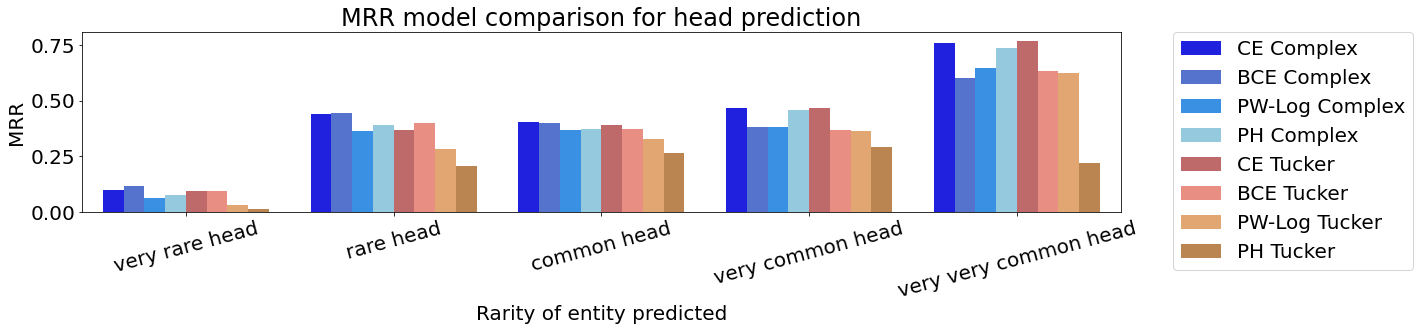

In [149]:
plot_entity_common(df, [], mrr=True, save='head_pred_all_pathme')

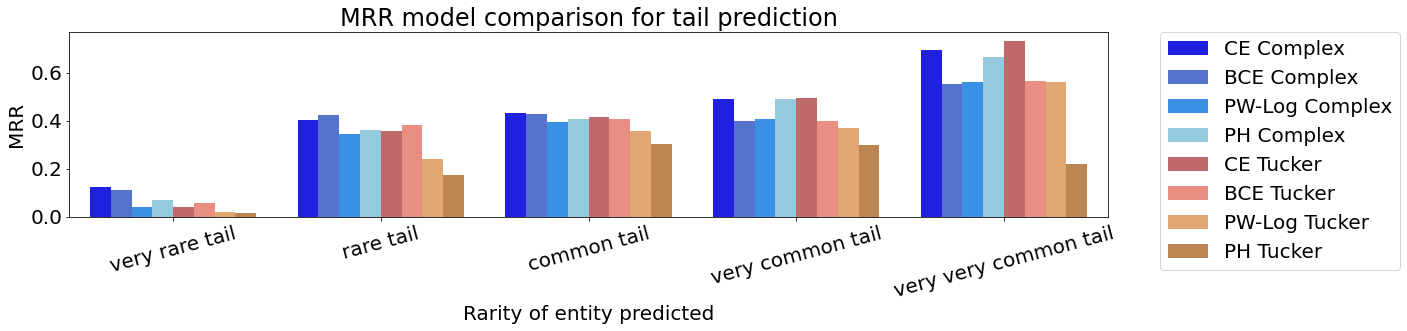

In [150]:
plot_entity_common(df, [], what='tail', mrr=True, save='tail_pred_all_pathme')